<a href="https://www.kaggle.com/code/fluloeo/sum-art?scriptVersionId=291034435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [61]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import ast
import matplotlib.pyplot as plt

/kaggle/input/articles/df_dict_test.csv


In [ ]:
# !pip install -U deepeval

# # Настройка API-ключа (используйте Add-ons -> Secrets в Kaggle для безопасности)
# # import os
# # os.environ['OPENAI_API_KEY'] = ''  # Или используйте Secrets

In [ ]:
# from deepeval import evaluate
# from deepeval.test_case import LLMTestCase
# from deepeval.metrics import SummarizationMetric
# from deepeval.metrics import GEval
# from deepeval.test_case import LLMTestCaseParams
# # Ваши данные: оригинал статьи и её сводка
# original_text = """Длинный текст вашей научной статьи здесь..."""
# generated_summary = """Сгенерированная моделью суммаризация здесь..."""

# # Создание тест-кейса и метрики
# test_case = LLMTestCase(input=original_text, actual_output=generated_summary)
# # Используйте assessment_questions для проверки конкретных аспектов
# metric = SummarizationMetric(
#     threshold=0.7,  # Порог успешного прохождения (0-1)
#     model="gpt-4o-mini",  # Модель-судья (можно изменить)
#     assessment_questions=[  # Пример вопросов для научной статьи
#         "Упомянута ли в сводке гипотеза исследования?",
#         "Описан ли использованный метод?",
#         "Приведены ли основные численные результаты?",
#         "Обсуждаются ли ограничения исследования?"
#     ],
#     include_reason=True  # Чтобы получить объяснение оценки
# )

# # Запуск оценки
# evaluate(test_cases=[test_case], metrics=[metric])
# # После выполнения можно вывести детали:
# print(f"Итоговый балл: {metric.score}")
# print(f"Причина: {metric.reason}")
# print(f"Детализация: Coverage={metric.score_breakdown['coverage_score']}, Alignment={metric.score_breakdown['alignment_score']}")



# # Определение кастомной метрики для научной суммаризации
# scientific_quality_metric = GEval(
#     name="Научная качественность",
#     criteria="""Оцени сводку научной статьи по следующим критериям:
#     1. **Точность**: Все факты, цифры и выводы точно соответствуют оригиналу.
#     2. **Полнота**: Отражены цель, методы, ключевые результаты и вывод.
#     3. **Ясность**: Логичная структура, понятный язык без жаргона.
#     4. **Значимость**: Выделены наиболее важные и новые аспекты исследования.""",
#     # Шаги рассуждения для модели-судьи (опционально, но повышает согласованность)
#     evaluation_steps=[
#         "Внимательно прочти оригинал статьи и сводку.",
#         "По пунктам проверь соответствие сводки критериям Точности, Полноты, Ясности и Значимости.",
#         "Присвой итоговый балл от 1 до 10, где 10 - идеальная сводка.",
#     ],
#     # Какие параметры тест-кейса использовать (original text = input, summary = actual_output)
#     evaluation_params=[LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT],
#     model="gpt-4",  # Можно использовать более мощную модель для сложных оценок
#     threshold=0.7
# )

# # Создание тест-кейса и запуск оценки (также через evaluate или .measure())
# test_case = LLMTestCase(input=original_text, actual_output=generated_summary)
# scientific_quality_metric.measure(test_case)
# print(f"Балл: {scientific_quality_metric.score}")
# print(f"Обоснование оценки: {scientific_quality_metric.reason}")

In [3]:
def append_summary_to_file(final_summary, filename='all_summaries.txt', directory='/kaggle/working/'):
    """
    Добавляет текст final_summary в конец указанного файла.

    Параметры:
        final_summary (str): Текст сводки для добавления в файл.
        filename (str): Имя файла (по умолчанию 'all_summaries.txt').
        directory (str): Путь к папке для сохранения (по умолчанию рабочая директория Kaggle).
    """
    # Формируем полный путь к файлу
    filepath = directory + filename

    # Открываем файл в режиме добавления ('a') с кодировкой UTF-8
    # Режим 'a' создаст файл, если его нет, и допишет текст в конец, если он существует
    with open(filepath, 'a', encoding='utf-8') as file:
        # Записываем текст и добавляем перенос строки для разделения записей
        file.write(final_summary + '\n')

    print(f'Текст добавлен в файл: {filepath}')


    

In [4]:
df = pd.read_csv('/kaggle/input/articles/df_dict_test.csv')
df

,id,title,abstract,dict_test
0,1602.04402,balanced truncation of linear time-invariant s...,this paper discusses model order reduction of ...,{'I. INTRODUCTION AND PROBLEM FORMULATIONS': '...
1,1611.01462,tying word vectors and word classifiers: a los...,recurrent neural networks have been very succe...,"{'INTRODUCTION': ""Neural network models have r..."
2,1611.04496,multi-view recurrent neural acoustic word embe...,recent work has begun exploring neural acousti...,{'INTRODUCTION': 'Word embeddings-continuous-v...
3,1808.00560,compressible spectral mixture kernels with spa...,spectral mixture (sm) kernels comprise a power...,"{'Introduction': ""Gaussian processes (GPs) con..."
4,2111.00405,limitations of the macaulay matrix approach fo...,recently chen and gao~\cite{chengao2017} propo...,{'Introduction': 'Solving systems of multivari...
...,...,...,...,...
95,2307.14341,virtual mirrors: non-line-of-sight imaging bey...,non-line-of-sight (nlos) imaging methods are c...,{'Computed image of': 'T-shaped object from a ...
96,2307.14354,learned gridification for efficient point clou...,neural operations that rely on neighborhood in...,{'Introduction': 'Point clouds provide sparse ...
97,2307.14362,learnable wavelet neural networks for cosmolog...,convolutional neural networks (cnns) have been...,{'Introduction': 'The process of extracting in...
98,2307.14392,human-centric scene understanding for 3d large...,human-centric scene understanding is significa...,{'Introduction': 'Human-centric scene understa...


*Пример для одной статьи:*

статьи 12 8 7 имеют проблемы с большим количеством чанков


In [76]:
from typing import List

def get_token_length(text: str) -> int:
    return len(tokenizer.encode(text))

def merge_small_chunks_by_tokens(chunks: List[str], min_tokens: int) -> List[str]:
    """
    Объединяет чанки, если их длина в ТОКЕНАХ меньше min_tokens.
    Слияние происходит с наименьшим соседом (по количеству токенов).
    """
    processed_chunks = chunks[:]
    separator = " " # Разделитель при склейке
    
    i = 0
    while i < len(processed_chunks):
        current_chunk = processed_chunks[i]
        current_len = get_token_length(current_chunk)
        if current_len >= min_tokens:
            i += 1
            continue
        if len(processed_chunks) == 1:
            break
        if i > 0:
            left_len = get_token_length(processed_chunks[i-1])
        else:
            left_len = float('inf')

        if i < len(processed_chunks) - 1:
            right_len = get_token_length(processed_chunks[i+1])
        else:
            right_len = float('inf')
        if left_len < right_len:
            # print(f"DEBUG: Слияние '{processed_chunks[i][:20]}...' ВЛЕВО (Tokens: {current_len} + {left_len})")
            
            processed_chunks[i-1] = processed_chunks[i-1] + separator + processed_chunks[i]
            processed_chunks.pop(i)
            i -= 1 
        else:
            # print(f"DEBUG: Слияние '{processed_chunks[i][:20]}...' ВПРАВО (Tokens: {current_len} + {right_len})")
            processed_chunks[i] = processed_chunks[i] + separator + processed_chunks[i+1]
            processed_chunks.pop(i+1)
    return processed_chunks




In [117]:
def merge_chunks_in_dataset(df=df, min_tokens=100, n=100, n_threshold = 10):
    data = pd.DataFrame(columns=['chunks'])
    max_len_chunks = []
    max_size_chunks = []
    min_size_chunks = []
    for i in range(n):
        data_dict = ast.literal_eval(df['dict_test'].iloc[i])
        tokens_chunks_list_0 = list(map(lambda x: get_token_length(x), list(data_dict.values())))
        if len(tokens_chunks_list_0)>n_threshold or min(tokens_chunks_list_0)<min_tokens:
            final_chunks = merge_small_chunks_by_tokens(list(data_dict.values()), min_tokens=min_tokens)
            # print(f"\nКонечное количество чанков: {len(final_chunks)}\n")
            tokens_chunks_list = list(map(lambda x: get_token_length(x), final_chunks))
            # print('Максимальный размер чанка',max(tokens_chunks_list),'\n')
            max_len_chunks.append(len(final_chunks))
            max_size_chunks.append(max(tokens_chunks_list))
            min_size_chunks.append(min(tokens_chunks_list))
            data.loc[len(data)] = [final_chunks]
        else:
            print("Ничего не меняем, кол-во чанков, мин токенов", len(tokens_chunks_list_0),min(tokens_chunks_list_0))
            data.loc[len(data)] = [data_dict]
    print('Максимальное Кол-во чанков из всех статей\n',(max(max_len_chunks)))
    print('Минимальное Кол-во чанков из всех статей\n',(min(max_len_chunks)))
    print('Максимальный размер чанка из всех статей\n',max(max_size_chunks))
    print('Минимальный размер чанка из всех статей\n',min(min_size_chunks))
    return data
data = merge_chunks_in_dataset(df=df, min_tokens=700, n=20,n_threshold = 10)

Максимальное Кол-во чанков из всех статей
 14
Минимальное Кол-во чанков из всех статей
 5
Максимальный размер чанка из всех статей
 3331
Минимальный размер чанка из всех статей
 706


In [100]:
data.tail()

,chunks
15,[Humanoid robots have gained prominence for th...
16,"[In recent years, transformer models have show..."
17,[Disinformation is a recurring threat to socie...
18,[Voice conversion (VC) is a technology that co...
19,[Sequential recommendation processes sequences...


In [6]:
!pip install -U bitsandbytes accelerate transformers -q
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-4B-Instruct-2507")
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen3-4B-Instruct-2507",
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

torch.cuda.empty_cache()
!pip install langchain==0.0.208  -q
from langchain.text_splitter import RecursiveCharacterTextSplitter
!pip install rouge-score evaluate -q
from rouge_score import rouge_scorer
import evaluate
rouge = evaluate.load('rouge')

!pip install bert-score -q
from bert_score import BERTScorer

scorer = BERTScorer(lang="en", model_type="bert-base-multilingual-cased")

!pip install longdocfactscore -q
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from longdocfactscore.ldfacts import LongDocFACTScore
ldfacts_scorer = LongDocFACTScore(device=device)
from tqdm.notebook import tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 34.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 110.4 MB/s eta 0:00:0000:010:01
cuda


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

2026-01-09 23:30:18.425984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768001418.879680      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768001419.002851      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768001420.046221      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768001420.046245      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768001420.046248      55 computation_placer.cc:177] computation placer alr

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 100.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 73.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.5 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
sigstore 4.1.0 requires pydantic<3,>=2, but you have pydantic 1.10.26 which is incompatible.
sigstore-models 0.0.5 requires pydantic>=2.11.7, but you ha

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.8 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Функция для того чтобы отправить инструкцию модели

In [9]:
def qwen(article, prompt, max_tokens):
    torch.cuda.empty_cache()
    final_prompt = f"{prompt}:\n\n{article}"
    messages = [{"role": "user", "content": final_prompt}]
    model.eval()
    with torch.no_grad():
        inputs = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=True,
            return_dict=True,
            return_tensors="pt",
            truncation=False
        ).to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            do_sample=False
        )
    final_summary = tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:], skip_special_tokens=True)
    return final_summary

Функция для обработки чанков статьи, встроенный text_splitter можно отключить

In [10]:
def summarize(article, prompt_0, prompt_1,chunk_size=1500, max_tokens_0=700, max_tokens_1=700, text_splitter = True):
    torch.cuda.empty_cache()
    if text_splitter:
        text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
            tokenizer=tokenizer,
            chunk_size=chunk_size,
            chunk_overlap=chunk_size//20,
            separators=["\n\n", "\n", ". "],
            keep_separator=True
        )
        article_chunks = text_splitter.split_text(article)
    else:
        article_chunks = article
    summaries = []
    for i, chunk in tqdm(enumerate(article_chunks), total=len(article_chunks)):
        try:
            chunk_summary = qwen(article=chunk, prompt=prompt_0, max_tokens=max_tokens_0)
            #print(f"\nSummary chunk number {i}")
            #print(chunk_summary)
        except torch.cuda.OutOfMemoryError as e:
            print(f"⚠️ Ошибка нехватки памяти CUDA, слишком длинный чанк: {str(e)[:100]}...")
            return 'ERROR'

        summaries.append(chunk_summary)
        torch.cuda.empty_cache()
    combined_summary = "\n".join(summaries)
    
    try:
        final_summary = qwen(article=combined_summary, prompt=prompt_1, max_tokens=max_tokens_1)
    except torch.cuda.OutOfMemoryError as e:
        print(f"⚠️ Ошибка нехватки памяти CUDA при итоговой суммаризации: {str(e)[:100]}...")
        return 'ERROR'
    return final_summary

In [12]:
rouge_list = []
bert_list = []
ldfacts_list = []
summaries_list = []

def to_full_text(data_dict):
    text = ''
    for key, value in data_dict.items(): 
        text += f"{key}\n\n{value}\n\n"
    return text


for i in range(20):
    print(f"\n=== Статья {i} ===")
    #извлекаем чанки, абстракт, названия разделов
    article_dict = ast.literal_eval(df['dict_test'].iloc[i]) #словарь для i-той статьи 
    chunked_article = list(article_dict.values()) #список чанков
    chapters_list = list(article_dict.keys()) #список глав
    print('Список разделов')
    display(pd.DataFrame(chapters_list))
    abstract = df['abstract'].iloc[i] 
    article = to_full_text(article_dict) #полный текст статьи с ключами и значениями словаря
    
    print(f"Токенов в статье: {len(tokenizer.encode('\n'.join(chunked_article)))}")
    prompt_0 = "You're a science editor. Briefly summarize this fragment of the scientific text in original language. Do not add information that is not in the source texts"
    prompt_1 = "You're a science editor. Based on the following summaries of the parts of the article, create a single, coherent and concise summary of the entire scientific article in original language, highlighting the common goal, methods, key results and conclusion. Do not add information that is not in the source texts"
    
    summary_full = summarize(chunked_article, prompt_0 = prompt_0, prompt_1 = prompt_1, max_tokens_0 = 500, max_tokens_1 = 700, text_splitter = False)
    print(f'\nSummary article number {i}')
    print(summary_full)
    summaries_list.append({
        'article_id': i,
        'original_text': article,
        'abstract': abstract,
        'summary': summary_full
    })
    append_summary_to_file(f"--- Summury #{i} ---")
    append_summary_to_file(summary_full)
    append_summary_to_file("")
    
    results = rouge.compute(
    predictions=[summary_full],
    references=[article],
    use_stemmer=True
    )
    print("ROUGE Metrics:")

    rouge_dict = {}
    for key, value in results.items():
        print(f"{key}: {value:.4f}")
        rouge_dict[key] = value
    rouge_list.append(rouge_dict)

    _, _, F1 = scorer.score([summary_full], [abstract])
    bert_f1 = F1.item()
    print(f"\nBERTScore: F1 = {bert_f1:.4f}")
    bert_list.append(bert_f1)

    ldfacts_sum = ldfacts_scorer.score_src_hyp_long([article], [summary_full])
    ldfacts_abs = ldfacts_scorer.score_src_hyp_long([article], [abstract])
    print(f"LongDocFACTScore for sum: {ldfacts_sum[0]}")
    print(f"LongDocFACTScore for abstract: {ldfacts_abs[0]}")
    ldfacts_list.append({
        'for_summary': ldfacts_sum[0],
        'for_abstract': ldfacts_abs[0]
    })


=== Статья 0 ===
Список разделов


,0
0,I. INTRODUCTION AND PROBLEM FORMULATIONS
1,DRAFT
2,II. FUNDAMENTAL TOOL
3,IV. FREQUENCY-DEPENDENT BALANCED TRUNCATION OV...
4,Theorem 4.4 (Interval-type Frequency-dependent...
5,", n"
6,V. EXAMPLES
7,Indexes computation formula
8,"Berlin/Heidelberg, Germany"


Токенов в статье: 6903


  0%|          | 0/9 [00:00<?, ?it/s]


Summary article number 0
The article addresses model order reduction (MOR) for linear time-invariant continuous-time systems with large orders, where computational and storage costs hinder simulation, optimization, and design. The primary goal is to construct a reduced-order model of order 3 that accurately approximates the system's dynamic behavior near ω = 0, particularly within a known finite frequency interval. Standard balanced truncation (FIBT) is inadequate for this finite-frequency objective, as it provides entire-frequency error bounds and does not optimize in-band performance. To improve finite-frequency approximation, balancing-related methods such as singular perturbation approximation (SPA), frequency-weighted balanced truncation (FWBT), and frequency-limited Grammians balanced truncation (FGBT) are considered. However, these methods either require iterative design, increase model order, or suffer from non-positive semi-definite Gramians and lack of error bounds.  

The s

,0
0,INTRODUCTION
1,BACKGROUND: RECURRENT NEURAL NETWORK LANGUAGE ...
2,AUGMENTING THE CROSS-ENTROPY LOSS
3,THEORETICALLY DRIVEN REUSE OF WORD EMBEDDINGS
4,RELATED WORK
5,EXPERIMENTS
6,MODEL AND TRAINING HIGHLIGHTS
7,EMPIRICAL VALIDATION FOR THE THEORY OF REUSING...
8,RESULTS ON PTB AND WIKITEXT-2 DATASETS
9,QUALITATIVE RESULTS


Токенов в статье: 5944


  0%|          | 0/14 [00:00<?, ?it/s]


Summary article number 1
The article proposes a novel loss framework for recurrent neural network language models (RNNLMs) that addresses two key limitations of conventional models: the absence of a natural metric on output classes and the treatment of inputs and outputs as isolated. The framework introduces two interlinked improvements: (1) an augmented cross-entropy loss that minimizes the Kullback-Leibler divergence between model predictions and a target distribution derived from word embedding similarities, thereby leveraging the intrinsic metric structure of language embeddings; and (2) a theoretical and empirical mechanism that ties the output projection matrix to the input embedding matrix by reusing the input embedding matrix as the output classification matrix, reducing model complexity and improving information efficiency. The method is validated on the Penn Treebank and Wikitext-2 datasets, where models incorporating both improvements outperform baseline RNNLMs, with the co

,0
0,INTRODUCTION
1,OUR APPROACH
2,MULTI-VIEW LEARNING OF ACOUSTIC WORD EMBEDDINGS
3,RECURRENT NEURAL NETWORK ARCHITECTURE
4,RELATED WORK
5,EXPERIMENTS AND RESULTS
6,DATA
7,MODEL DETAILS AND HYPERPARAMETER TUNING
8,EFFECTS OF DIFFERENT OBJECTIVES
9,Objective


Токенов в статье: 6253


  0%|          | 0/19 [00:00<?, ?it/s]


Summary article number 2
This work proposes a multi-view approach to learn acoustic word embeddings that capture the phonetic characteristics of words by jointly modeling acoustic and orthographic sequences. Unlike prior single-view methods that rely on classification or non-learned distance metrics like dynamic time warping, the proposed method uses bidirectional LSTM networks to learn fixed-dimensional embeddings from both acoustic features (e.g., MFCCs) and character sequences. A multi-view contrastive loss is introduced, enforcing that embeddings of matched acoustic-orthographic pairs are closer than those of mismatched pairs, enabling direct comparison between spoken and written forms. The method includes both fixed-margin and cost-sensitive contrastive objectives, with the latter adjusting the margin based on Levenshtein edit distance to better align embedding distances with orthographic similarity.  

Experiments on the Switchboard corpus show that the multi-view approach signi

,0
0,Introduction
1,Background and related work
2,Gaussian processes
3,Spectral mixture kernels
4,Related work
5,Motivation
6,Spectral mixture kernel with dependency structure
7,Modeling dependency structure using convolution
8,Time and phase characterized Gaussian spectral...
9,Time-and phase modulated dependency structure


Токенов в статье: 8151


  0%|          | 0/26 [00:00<?, ?it/s]


Summary article number 3
The article proposes a novel spectral mixture kernel with dependency structure (SMD) that extends the classical spectral mixture (SM) kernel by explicitly modeling inter-component dependencies through a generalized cross covariance derived from Bienaymé’s identity. Unlike existing SM variants that assume independence among components, the SMD kernel captures cross-covariances between Gaussian process components using a complex-valued Gaussian mixture model with time and phase delays, enabling the modeling of temporal and phase-dependent interactions. The kernel’s spectral density is parameterized via a complex-valued Fourier transform, incorporating time and phase delays to represent realistic signal dynamics. The resulting kernel is positive definite and interpretable, with its spectral properties providing insight into dependency structures. To address challenges in hyperparameter initialization, component selection, and interpretability, the authors introdu

,0
0,Introduction
1,Macaulay linear systems and their tQLScn
2,Macaulay linear systems
3,Lower bound on the truncated QLS condition num...
4,Comparison to brute-force search
5,The Boolean Macaulay linear system and its tQLScn
6,The Boolean Macaulay matrix over C
7,Definition 5.1. The Boolean Macaulay matrix B ...
8,Lower bound on the tQLScn κ
9,Details comparing running times


Токенов в статье: 13917


  0%|          | 0/16 [00:00<?, ?it/s]


Summary article number 4
The article studies the problem of solving systems of multivariate polynomial equations over \( \mathbb{F}_2 \), which is known to be NP-complete. The approach involves linearizing the system via the Macaulay matrix, which encodes the polynomials and their monomial products. The authors analyze the application of the HHL quantum linear system (QLS) algorithm to solve this linear system, aiming to avoid explicit Gröbner basis computation. They demonstrate that the standard requirements for QLS—efficient preparation of the input state, solution extraction, and sparse matrix access—are satisfied. However, they prove an exponential lower bound on the condition number \( \kappa \) of the Macaulay matrix, specifically \( \Omega(n^h) \) for a unique solution with Hamming weight \( h \), and show that this bound holds even under max degree. This implies that the HHL-based quantum algorithm requires exponential time in the worst case, with complexity \( \Omega((3n)^{h/

,0
0,Introduction
1,The SIMMC 2.0 Dataset
2,Multi-Modal Coreference Resolution and Disambi...
3,Baselines
4,Models
5,Sub-Task #1 Model
6,Sub-Task #2 Model
7,Multi-Modal model definition
8,Sub-Task #1 Experiments
9,Sub-Task #2 Experiments


Токенов в статье: 7446


  0%|          | 0/17 [00:00<?, ?it/s]


Summary article number 5
This paper presents a submission to the SIMMC 2.0 challenge, aiming to develop a conversational agent acting as a shopping assistant that operates within immersive scene contexts by leveraging only accessible metadata. The core goal is to enable effective dialogue in real-world tasks through accurate disambiguation and coreference resolution, both of which depend on multi-modal context (language and visual scene). The authors propose two models: a disambiguation predictor based on TOD-BERT and a coreference resolver using LXMERT with object descriptions derived from visual features. Both models are evaluated on sub-tasks involving ambiguity detection and object reference resolution.  

Key results show that disambiguation can be predicted with over 88% accuracy using only linguistic context—without dialogue history or visual input—suggesting that language models exploit syntactic patterns (e.g., prepositions, wh-questions, sentence length) and data biases. In 

,0
0,Introduction
1,Related Work
2,Contributions
3,Methodology
4,Background
5,UNet
6,Spatial Transformers
7,Graph Neural Networks and SCGNet
8,Proposed Method: MICDIR
9,Hypotheses


Токенов в статье: 9621


  0%|          | 0/30 [00:00<?, ?it/s]


Summary article number 6
The proposed method, MICDIR (Multi-scale Inverse-Consistent Deformable Image Registration), presents an unsupervised deep learning framework for both intramodal and intermodal brain MRI registration. It leverages a multi-scale UNet architecture with self-constructing graph latent network (SCGNet) to capture global structural dependencies and handle deformations of varying scales, while enforcing inverse consistency via cycle consistency loss to ensure symmetric and physically plausible transformations. The model integrates semantic information through SCGNet, employs multi-scale supervision to improve training stability and fine-detail preservation, and ensures deformation consistency in both forward and inverse directions. Evaluated on the IXI dataset using T1w and T2w MRI pairs, MICDIR outperforms non-deep learning (ANTS SyN) and three deep learning baselines (ICNet, Voxelmorph, ADMIR) in both intramodal and intermodal registration tasks, achieving statistic

,0
0,Introduction
1,Guidelines on techniques and tricks for effici...
2,Transformers: Nuts and Bolts
3,The Transformer Architecture
4,Self-Attention Operation
5,The Intuition Behind Self-Attention
6,"Linearly Weighting Input Using Query, Key, and..."
7,Multi-Head Self-Attention
8,Step 1 -Generation of Multiple Sets of Distinc...
9,Step-2 -Scaled Dot Product Operations in Parallel


Токенов в статье: 11993


  0%|          | 0/53 [00:00<?, ?it/s]

⚠️ Ошибка нехватки памяти CUDA при итоговой суммаризации: CUDA out of memory. Tried to allocate 5.54 GiB. GPU 0 has a total capacity of 14.74 GiB of which 4.5...

Summary article number 7
ERROR
Текст добавлен в файл: /kaggle/working/all_summaries.txt
Текст добавлен в файл: /kaggle/working/all_summaries.txt
Текст добавлен в файл: /kaggle/working/all_summaries.txt
ROUGE Metrics:
rouge1: 0.0002
rouge2: 0.0000
rougeL: 0.0002
rougeLsum: 0.0002

BERTScore: F1 = 0.5557
LongDocFACTScore for sum: -13.103875160217285
LongDocFACTScore for abstract: -4.566188255945842

=== Статья 8 ===
Список разделов


,0
0,Fully Homomorphic Encryption
1,The BGV Cryptosystem
2,Basic Homomorphic Operations
3,Auxiliary Homomorphic Operations
4,Bootstrapping
5,Data Representation and Algorithms
6,Residue Number System
7,Number-Theoretic Transform
8,Implemented Algorithms and Parameter Sets
9,Supported Parameter Sets


Токенов в статье: 12333


  0%|          | 0/29 [00:00<?, ?it/s]

⚠️ Ошибка нехватки памяти CUDA при итоговой суммаризации: CUDA out of memory. Tried to allocate 5.22 GiB. GPU 0 has a total capacity of 14.74 GiB of which 4.9...

Summary article number 8
ERROR
Текст добавлен в файл: /kaggle/working/all_summaries.txt
Текст добавлен в файл: /kaggle/working/all_summaries.txt
Текст добавлен в файл: /kaggle/working/all_summaries.txt
ROUGE Metrics:
rouge1: 0.0002
rouge2: 0.0000
rougeL: 0.0002
rougeLsum: 0.0002

BERTScore: F1 = 0.5086
LongDocFACTScore for sum: -10.333335876464844
LongDocFACTScore for abstract: -5.4921878178914385

=== Статья 9 ===
Список разделов


,0
0,", 20% ons"
1,C. Comple
2,D. Our Final Selection
3,III. Selected Ternary Full Adders
4,H+ c
5,D. Design in [103]
6,E. Design in [58]
7,G. Design in [60]
8,H. Design in
9,IV. Simulation Results and Comparison


Токенов в статье: 7209


  0%|          | 0/12 [00:00<?, ?it/s]


Summary article number 9
The article presents a comprehensive taxonomic classification and performance analysis of ternary logic circuits, focusing on Ternary Full Adders (TFAs). The primary goal is to identify, evaluate, and simplify existing TFA designs to improve their power efficiency, speed, and transistor count. The review identifies 13 ternary logic styles, most derived from binary logic, including CMOS, CML, dynamic, and decoder-based approaches, with static logic dominating (90.4%) and dynamic and CML designs being rare due to power and complexity issues. Input decoding methods are categorized, with multi-threshold transistors being the most prevalent. A comprehensive set of 84 initial designs is pruned to 11 representative papers based on criteria such as full transistor implementation, single-V DD operation, unbalanced ternary logic, and power efficiency, eliminating designs with multi-V DD, balanced ternary, dynamic logic, or poor power characteristics. Key simplifications

,0
0,III. MODEL
1,A. Components
2,B. Trade-offs of discrete audio representations
3,C. Hierarchical modeling of semantic and acous...
4,D. Inference
5,IV. EXPERIMENTS
6,A. Datasets
7,"B. Model selection, training and inference"
8,C. Information represented by the semantic tokens
9,D. Information represented by the acoustic tokens


Токенов в статье: 7913


  0%|          | 0/19 [00:00<?, ?it/s]


Summary article number 10
AudioLM is a framework for high-fidelity audio generation that achieves both long-term structural coherence and high audio quality through a hierarchical, multi-stage autoregressive model using a hybrid tokenization scheme. The framework employs acoustic tokens—derived from a SoundStream neural codec—to preserve fine-grained acoustic details and speaker identity, and semantic tokens—extracted from w2v-BERT and clustered via k-means—to capture linguistic content and long-term temporal structure. These are processed in three cascaded stages: first, semantic tokens are generated autoregressively; second, coarse acoustic tokens are predicted conditionally on semantic tokens to preserve speaker identity and recording conditions; third, fine acoustic tokens are generated to refine audio quality and remove compression artifacts. The hierarchical design enables efficient modeling of long sequences while maintaining fidelity. Experiments show that semantic tokens effe

,0
0,I. INTRODUCTION
1,II. MOTIVATION
2,A. Prompt Engineering
3,B. Querying an LLM
4,C. Test Postprocessing
5,D. Selection and Ranking
6,IV. EVALUATION
7,A. Dataset
8,B. Metrics
9,C. Environment


Токенов в статье: 10101


  0%|          | 0/23 [00:00<?, ?it/s]


Summary article number 11
The article addresses the under-explored problem of generating test cases from bug reports, a critical yet under-researched aspect of software testing, especially in safety-critical systems. While automated test generation has been studied for decades, most prior work focuses on crash reproduction or regression testing, neglecting the need for tests derived directly from bug reports—where such tests are often absent at report time. The authors analyze 300 open-source Java projects and find that bug-report-linked test commits account for a median of 28.4% of total test suites, underscoring the practical importance of this problem. In the Defects4J benchmark, 96% of bugs lack prior bug-revealing tests, limiting automated debugging. To bridge this gap, the authors propose LIBRO, a framework that leverages Large Language Models (LLMs) to generate test candidates from natural language bug reports, processes them for executability, and ranks them to minimize develo

,0
0,Introduction
1,Examples
2,BARBARA KALTENBACHER
3,5
4,Notation
5,Structure exploiting reconstruction methods an...
6,Variational reconstruction
7,Iterative reconstruction
8,A frozen Newton method
9,nsp(P)


Токенов в статье: 18119


  0%|          | 0/29 [00:00<?, ?it/s]

⚠️ Ошибка нехватки памяти CUDA при итоговой суммаризации: CUDA out of memory. Tried to allocate 8.84 GiB. GPU 0 has a total capacity of 14.74 GiB of which 1.0...

Summary article number 12
ERROR
Текст добавлен в файл: /kaggle/working/all_summaries.txt
Текст добавлен в файл: /kaggle/working/all_summaries.txt
Текст добавлен в файл: /kaggle/working/all_summaries.txt
ROUGE Metrics:
rouge1: 0.0002
rouge2: 0.0000
rougeL: 0.0002
rougeLsum: 0.0002

BERTScore: F1 = 0.5329
LongDocFACTScore for sum: -13.511157035827637
LongDocFACTScore for abstract: -4.684328715006511

=== Статья 13 ===
Список разделов


,0
0,Introduction
1,Output Automaton
2,Preliminaries
3,Trajectories and Hybrid automata
4,Definition 2 (Run).
5,Linear Multistep Method
6,Dynamic Time Warping (DTW)
7,HA Learning from Input-Output Trajectories
8,Identification of Locations
9,Segmentation of the Trajectories


Токенов в статье: 10044


  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print("\n--- ROUGE Metrics (средние значения) ---")
for key in rouge_list[0].keys():
    avg = sum(r[key] for r in rouge_list) / len(rouge_list)
    print(f"{key}: {avg:.4f}")

avg_bert = sum(bert_list) / len(bert_list)
print(f"\n--- BERTScore F1 (среднее): {avg_bert:.4f} ---")

avg_sum = sum(l['for_summary'] for l in ldfacts_list) / len(ldfacts_list)
avg_abs = sum(l['for_abstract'] for l in ldfacts_list) / len(ldfacts_list)

print(f"\n--- LongDocFACTScore (средние) ---")
print(f"Для суммаризаций: {avg_sum:.4f}")
print(f"Для абстрактов: {avg_abs:.4f}")

*С text_splitter:*

я забыл сохранить переменную summaries_list прежде чем запустить следующую ячейку :))))))

In [ ]:
rouge_list = []
bert_list = []
ldfacts_list = []
summaries_list = []

for i in range(5):
    print(f"\n=== Статья {i} ===")
    #извлекаем чанки, абстракт, названия разделов
    article_dict = ast.literal_eval(df['dict_test'].iloc[i]) #словарь для i-той статьи 
    chunked_article = list(article_dict.values()) #список чанков
    # chapters_list = list(article_dict.keys()) #список глав
    # print('Список разделов')
    # display(pd.DataFrame(chapters_list))
    abstract = df['abstract'].iloc[i] 
    article = to_full_text(article_dict) #полный текст статьи с ключами и значениями словаря
    
    print(f"Токенов в статье: {len(tokenizer.encode('\n'.join(chunked_article)))}")
    prompt_0 = "You're a science editor. Briefly summarize this fragment of the scientific text in original language. Do not add information that is not in the source texts"
    prompt_1 = "You're a science editor. Based on the following summaries of the parts of the article, create a single, coherent and concise summary of the entire scientific article in original language, highlighting the common goal, methods, key results and conclusion. Do not add information that is not in the source texts"
    
    summary_full = summarize(article, prompt_0 = prompt_0, prompt_1 = prompt_1,chunk_size = 1500, max_tokens_0 = 500, max_tokens_1 = 700, text_splitter = True)
    print(f'\nSummary article number {i}')
    print(summary_full)
    summaries_list.append({
        'article_id': i,
        'original_text': article,
        'abstract': abstract,
        'summary': summary_full
    })

    results = rouge.compute(
    predictions=[summary_full],
    references=[article],
    use_stemmer=True
    )
    print("ROUGE Metrics:")

    rouge_dict = {}
    for key, value in results.items():
        print(f"{key}: {value:.4f}")
        rouge_dict[key] = value
    rouge_list.append(rouge_dict)

    _, _, F1 = scorer.score([summary_full], [abstract])
    bert_f1 = F1.item()
    print(f"\nBERTScore: F1 = {bert_f1:.4f}")
    bert_list.append(bert_f1)

    ldfacts_sum = ldfacts_scorer.score_src_hyp_long([article], [summary_full])
    ldfacts_abs = ldfacts_scorer.score_src_hyp_long([article], [abstract])
    print(f"LongDocFACTScore for sum: {ldfacts_sum[0]}")
    print(f"LongDocFACTScore for abstract: {ldfacts_abs[0]}")
    ldfacts_list.append({
        'for_summary': ldfacts_sum[0],
        'for_abstract': ldfacts_abs[0]
    })

In [ ]:
print("\n--- ROUGE Metrics (средние значения) ---")
for key in rouge_list[0].keys():
    avg = sum(r[key] for r in rouge_list) / len(rouge_list)
    print(f"{key}: {avg:.4f}")

avg_bert = sum(bert_list) / len(bert_list)
print(f"\n--- BERTScore F1 (среднее): {avg_bert:.4f} ---")

avg_sum = sum(l['for_summary'] for l in ldfacts_list) / len(ldfacts_list)
avg_abs = sum(l['for_abstract'] for l in ldfacts_list) / len(ldfacts_list)

print(f"\n--- LongDocFACTScore (средние) ---")
print(f"Для суммаризаций: {avg_sum:.4f}")
print(f"Для абстрактов: {avg_abs:.4f}")

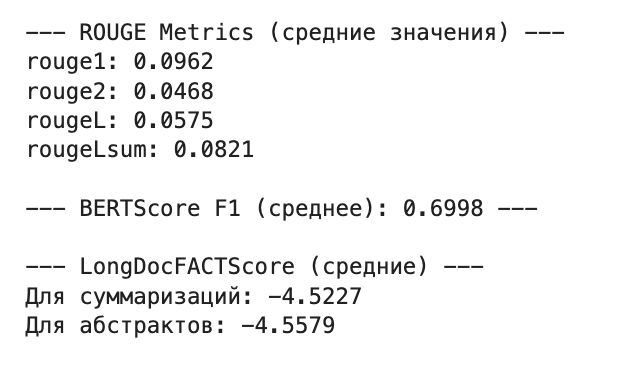

различия несущественные, но эти метрики все равно неинформативны